In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [4]:
df=pd.read_csv(r"E:\Amazon Review Data Web Scrapping.csv")
df

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral
...,...,...,...,...,...,...
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60889 non-null  int64 
 1   Category       60889 non-null  object
 2   Review_Header  60884 non-null  object
 3   Review_text    60857 non-null  object
 4   Rating         60889 non-null  int64 
 5   Own_Rating     60889 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.8+ MB


In [6]:
df.head()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral


In [7]:
df.tail()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral
60888,167823,mobile,Not recommend,fingerprint reader average Camera quality belo...,3,Neutral


In [8]:
df.shape

(60889, 6)

In [9]:
df.isnull().sum()

Unique_ID         0
Category          0
Review_Header     5
Review_text      32
Rating            0
Own_Rating        0
dtype: int64

In [10]:
object_cols = df.select_dtypes(include='object').columns

# Loop through object columns and fill NaNs with mode
for col in object_cols:
    if df[col].isnull().sum() > 0:  # Only fill if there are missing values
        df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
df.isnull().sum()

Unique_ID        0
Category         0
Review_Header    0
Review_text      0
Rating           0
Own_Rating       0
dtype: int64

In [12]:
df.columns

Index(['Unique_ID', 'Category', 'Review_Header', 'Review_text', 'Rating',
       'Own_Rating'],
      dtype='object')

In [13]:
df=df.drop(['Unique_ID', 'Category', 'Review_Header', 'Rating'],axis=1)
df

,Review_text,Own_Rating
0,I liked it,Positive
1,I bought the phone on Amazon and been using my...,Positive
2,"Awesome book at reasonable price, must buy ......",Positive
3,good,Positive
4,"The book is fine,not bad,contains nice concept...",Neutral
...,...,...
60884,Ok,Positive
60885,"Value for money, using since more than 4 month...",Positive
60886,Very nice products,Positive
60887,Heating problem. Battery backup less than.,Neutral


In [14]:
df=df.sample(frac=1)
#sample(frac=1) used for shuffling the dataset
#otherwise it will be biased during splitting train test
df

,Review_text,Own_Rating
1285,Some times comes facebook it's responding,Positive
36254,Good,Positive
12782,A good book,Positive
43218,Low price best mobile thank you Samsung.camera...,Positive
24562,Fingerprint excellent Camera night shot is ok ...,Positive
...,...,...
13099,"Osam camera,,,rear and front both cameras r mo...",Positive
24084,There is a button on the power brick that is d...,Positive
31518,Awesome fridge...they will call and schedule t...,Positive
47210,Amazing product at a very much affordable pric...,Positive


In [15]:
def wordopt(Review_text): #creating function to process text
    Review_text=Review_text.lower()
    Review_text=re.sub('\[.*?\]','',Review_text)
    Review_text=re.sub("\\W"," ",Review_text)
    Review_text=re.sub('https?://\S+|www\.\S+','',Review_text)
    Review_text=re.sub('<.*?>+','',Review_text)
    Review_text=re.sub('[%s]'% re.escape(string.punctuation),'',Review_text)
    Review_text=re.sub('\n','',Review_text)
    Review_text=re.sub('\w*\d\w*','',Review_text)
    return Review_text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Dell\AppData\Local\Temp\ipykernel_7712\3696820203.py:3: SyntaxWarning: invalid escape sequence '\['
  Review_text=re.sub('\[.*?\]','',Review_text)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7712\3696820203.py:5: SyntaxWarning: invalid escape sequence '\S'
  Review_text=re.sub('https?://\S+|www\.\S+','',Review_text)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7712\3696820203.py:9: SyntaxWarning: invalid escape sequence '\w'
  Review_text=re.sub('\w*\d\w*','',Review_text)


In [16]:
df["Review_text"]=df["Review_text"].apply(wordopt)
df

,Review_text,Own_Rating
1285,some times comes facebook it s responding,Positive
36254,good,Positive
12782,a good book,Positive
43218,low price best mobile thank you samsung camera...,Positive
24562,fingerprint excellent camera night shot is ok ...,Positive
...,...,...
13099,osam camera rear and front both cameras r mo...,Positive
24084,there is a button on the power brick that is d...,Positive
31518,awesome fridge they will call and schedule t...,Positive
47210,amazing product at a very much affordable pric...,Positive


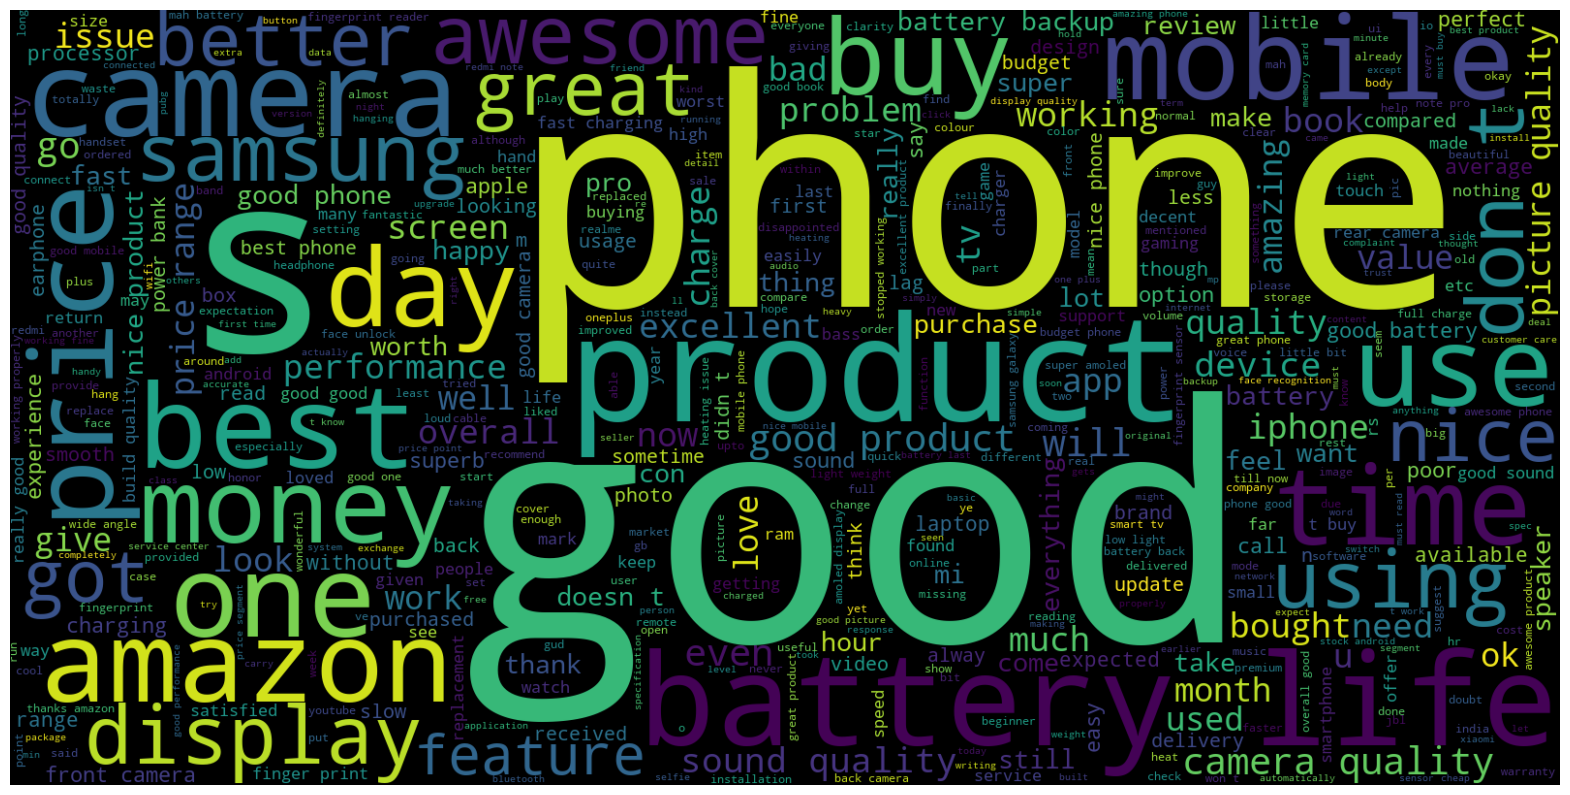

In [17]:
Review_text=' '.join([word for word in df['Review_text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(Review_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
x=df['Review_text']
y=df['Own_Rating']
print(x)
print(y)

1285             some times comes facebook it s responding
36254                                                 good
12782                                          a good book
43218    low price best mobile thank you samsung camera...
24562    fingerprint excellent camera night shot is ok ...
                               ...                        
13099    osam camera   rear and front both cameras r mo...
24084    there is a button on the power brick that is d...
31518    awesome fridge   they will call and schedule t...
47210    amazing product at a very much affordable pric...
34842                 without any doubt this is best book 
Name: Review_text, Length: 60889, dtype: object
1285     Positive
36254    Positive
12782    Positive
43218    Positive
24562    Positive
           ...   
13099    Positive
24084    Positive
31518    Positive
47210    Positive
34842    Positive
Name: Own_Rating, Length: 60889, dtype: object


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(45666,) (15223,) (45666,) (15223,)


In [21]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train) #train-fit
xv_test=vectorization.transform(x_test)#test-tran

In [22]:
xv_train

<45666x20312 sparse matrix of type '<class 'numpy.float64'>'
	with 841972 stored elements in Compressed Sparse Row format>

In [23]:
print(xv_train.shape,xv_test.shape)

(45666, 20312) (15223, 20312)


In [24]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr1=LR.predict(xv_test)
pred_lr1

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score,f1_score

In [26]:
print(accuracy_score(y_test,pred_lr1))

0.870524863693096


In [27]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)
predict1 = MNB.predict(xv_test)
predict1

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [28]:
print(accuracy_score(y_test,predict1))

0.813374499113184


In [29]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(xv_train,y_train)
predict3 = BNB.predict(xv_test)
predict3

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [30]:
print(accuracy_score(y_test,predict3))

0.7844051763778493


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier()
GB.fit(xv_train,y_train)
ypred_gra1 = GB.predict(xv_test)
ypred_gra1


array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [32]:
print(accuracy_score(y_test,ypred_gra1))


0.8502266307560927


In [33]:
pd.set_option('display.max_colwidth', None)

In [34]:
x.head()

1285                                   some times comes facebook it s responding
36254                                                                       good
12782                                                                a good book
43218      low price best mobile thank you samsung camera quality disappointment
24562    fingerprint excellent camera night shot is ok but not good battery best
Name: Review_text, dtype: object

In [35]:
y.head()

1285     Positive
36254    Positive
12782    Positive
43218    Positive
24562    Positive
Name: Own_Rating, dtype: object

In [36]:
example = [''' best phone in this range''']
# Transform the example text
example_vectorized = vectorization.transform(example)
#Make predictions on the example data
result = LR.predict(example_vectorized)

print(result)

['Positive']


In [37]:
example = [''' super''']
# Transform the example text
example_vectorized = vectorization.transform(example)
#Make predictions on the example data
result = MNB.predict(example_vectorized)

print(result)

['Positive']
